In [1]:
# load libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import segyio
#from scipy import io
#import matlab.engine
#import matlab

In [2]:
data = np.load('data/11_data_x.npy')

In [3]:
def seismic_grey(data,extent=None,percn=90,fig=(5,4),outlier=False):
    """
    data [time,space]
    """
    from scipy import stats
        
    if outlier: # remove outliers from data
        data = stats.zscore(data,axis=1) # along x - space
    
    plt.figure(figsize=fig)
    v = np.percentile(data,percn)
    plt.imshow(data,vmax=v,vmin=-v,cmap='gray',aspect='auto')
    plt.colorbar()
    plt.tight_layout()
    


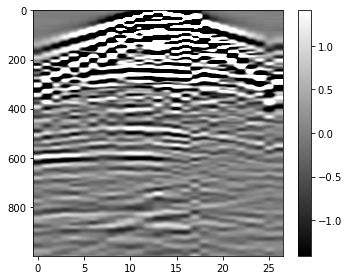

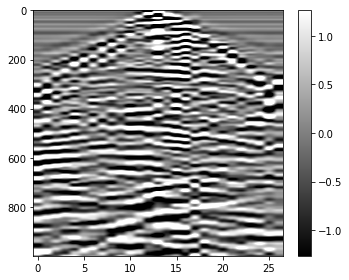

In [4]:
seismic_grey(data.T,outlier=False)
seismic_grey(data.T,outlier=True)

In [5]:
def seismic_wiggle(data,dt,sc=1,fig=(5,4),outlier=False,color='k'):
        ''' 
        wiggle(data,dt,sc) - plots a shaded wiggle plot
        '''
        from scipy import stats
        if outlier: # remove outliers from data
            data = stats.zscore(data,axis=1) # along x - space
            
        nt,nx = data.shape
        traces = np.arange(1,nx+1,1)
        if nt <1 :
            raise IndexError('Nothing to plot')
        if nx < 1:
            raise IndexError('Nothing to plot')
        t = np.arange(0,nt*dt,dt)
        scale = (2*np.mean(np.diff(traces))) * (sc / np.max(np.max(data)-np.min(data)))
        data = data * scale;
        t0_offset = 0
        
        plt.figure(figsize=fig)
        plt.ylim(max(t),0)
        x0,x1 = 0,nx
        dx = float((x1-x0)/nx)
        plt.xlim(x0,x1)
    
        for i,trace in enumerate(data.transpose()):
            tr = (trace-t0_offset)*dx
            x = x0 + i*dx # x positon for this trace
            plt.plot(x+tr,t,'k')
            plt.fill_betweenx(t,x+tr,x,tr>0,color=color)

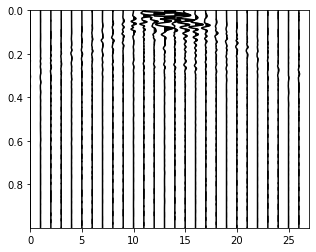

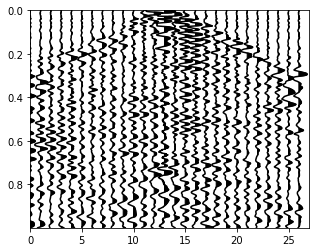

In [ ]:
seismic_wiggle(data.T,0.001)
seismic_wiggle(data.T,0.001,outlier=True)